In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

In [4]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input

In [5]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_ds = train_gen.flow_from_directory(directory='../input/weather/train',
                                         target_size=(150,150), 
                                         color_mode='rgb',
                                        shuffle=True)

Found 901 images belonging to 4 classes.


In [6]:


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds = val_gen.flow_from_directory(directory='../input/weather/validation',
                                         target_size=(150,150), 
                                         color_mode='rgb',
                                        shuffle=False)

Found 224 images belonging to 4 classes.


In [7]:
base_model = Xception(include_top=False, 
                      weights='imagenet',
                      input_shape=(150,150,3))
base_model.trainable = False

inputs = keras.Input(shape=(150,150,3))
base = base_model(inputs, training=False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
layer1 = keras.layers.Dense(64,activation='relu')(vectors)
drop2 = keras.layers.Dropout(rate=0.4)(layer1)
output = keras.layers.Dense(4,activation='softmax')(drop2)

model = keras.Model(inputs, output)

2021-12-24 07:11:18.774248: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-24 07:11:18.874554: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-24 07:11:18.875240: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-24 07:11:18.876512: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

83697664/83683744 [==============================] - 1s 0us/step


In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                131136    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 260       
Total params: 20,992,876
Trainable params: 131,396
Non-trainable params: 20,861,480
___________________________________________

In [9]:
callback = keras.callbacks.ModelCheckpoint('w_{epoch}_{val_accuracy:.3f}.h5',save_best_only=True)

In [10]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
loss = keras.losses.CategoricalCrossentropy()

model.compile(optimizer=optimizer, loss = loss,metrics=['accuracy'])

In [11]:
history = model.fit(train_ds, batch_size=20, epochs=15,validation_data=val_ds, callbacks=[callback])

2021-12-24 07:11:23.702253: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2021-12-24 07:11:27.484178: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


29/29 [==============================] - 21s 421ms/step - loss: 0.7017 - accuracy: 0.7392 - val_loss: 0.2991 - val_accuracy: 0.9018


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/15
29/29 [==============================] - 7s 261ms/step - loss: 0.2851 - accuracy: 0.9112 - val_loss: 0.2232 - val_accuracy: 0.9464
Epoch 3/15
29/29 [==============================] - 7s 262ms/step - loss: 0.1993 - accuracy: 0.9356 - val_loss: 0.1949 - val_accuracy: 0.9330
Epoch 4/15
29/29 [==============================] - 7s 247ms/step - loss: 0.1615 - accuracy: 0.9489 - val_loss: 0.1769 - val_accuracy: 0.9330
Epoch 5/15
29/29 [==============================] - 8s 266ms/step - loss: 0.1182 - accuracy: 0.9700 - val_loss: 0.1695 - val_accuracy: 0.9420
Epoch 6/15
29/29 [==============================] - 7s 259ms/step - loss: 0.1029 - accuracy: 0.9745 - val_loss: 0.1662 - val_accuracy: 0.9464
Epoch 7/15
29/29 [==============================] - 7s 240ms/step - loss: 0.0975 - accuracy: 0.9723 - val_loss: 0.1465 - val_accuracy: 0.9598
Epoch 8/15
29/29 [==============================] - 7s 258ms/step - loss: 0.1120 - accuracy: 0.9623 - val_loss: 0.1539 - val_accuracy: 0.9554
Epoch 

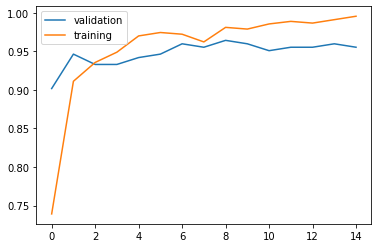

In [12]:
plt.plot(history.history['val_accuracy'], label='validation')
plt.plot(history.history['accuracy'], label='training')
plt.legend()
plt.show()

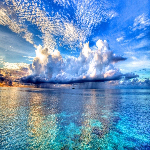

In [13]:
img = load_img('../input/cloudimage/cloud.jpg', target_size=(150,150))
img

In [14]:
X = np.array(img)
X = preprocess_input(X)
X

array([[[-0.6313726 , -0.32549018,  0.18431377],
        [-0.70980394, -0.35686272,  0.1686275 ],
        [-0.75686276, -0.35686272,  0.13725495],
        ...,
        [-0.34117645,  0.16078436,  0.99215686],
        [-0.64705884, -0.01176471,  0.8901961 ],
        [-0.6862745 , -0.01176471,  0.9372549 ]],

       [[-0.3490196 , -0.17647058,  0.27058828],
        [-0.3960784 , -0.15294117,  0.27058828],
        [-0.5294118 , -0.23137254,  0.254902  ],
        ...,
        [-0.40392154,  0.13725495,  0.94509804],
        [-0.54509807,  0.082353  ,  0.9529412 ],
        [-0.7254902 ,  0.0196079 ,  0.9607843 ]],

       [[-0.35686272, -0.19999999,  0.20000005],
        [-0.23921567, -0.09803921,  0.21568632],
        [-0.06666666,  0.0196079 ,  0.23921573],
        ...,
        [-0.44313723,  0.17647064,  0.96862745],
        [-0.6       ,  0.06666672,  0.90588236],
        [-0.69411767, -0.01960784,  0.9137255 ]],

       ...,

       [[-0.7882353 , -0.372549  , -0.12156862],
        [-0

In [15]:
model.predict(np.array([X]))

array([[2.0847314e-04, 6.9143098e-05, 9.9969113e-01, 3.1219613e-05]],
      dtype=float32)

In [16]:
val_ds.class_indices

{'cloudy': 0, 'rain': 1, 'shine': 2, 'sunrise': 3}